In [1]:
using DataFrames, PyPlot

In [2]:
X_base = readtable("Xbase.csv")[:,2:end];
y_base= readtable("ybase.csv")[:,2];
X_train = readtable("Xtrain.csv")[:,2:end];
y_train= readtable("ytrain.csv")[:,2];
feature_weight=readtable("featureimportance.csv")

,x,feature,importance
1,0,host_response_rate,0.005598798
2,1,accommodates,0.030950563
3,2,bathrooms,0.151968329
4,3,bedrooms,0.062684505
5,4,beds,0.009138629
6,5,summary_bool,0.000621698
7,6,neigh_overview_bool,0.001611131
8,7,traffic,0.001918696
9,8,superhost,0.002194251
10,9,host_vertified,0.001782405


In [4]:
X_base=convert(Array{Float64,2},X_base)
y_base=convert(Array,y_base)
X_train=convert(Array{Float64,2},X_train)
y_train=convert(Array,y_train)
importance=convert(Array,feature_weight[:,3])

92-element Array{Float64,1}:
 0.0055988  
 0.0309506  
 0.151968   
 0.0626845  
 0.00913863 
 0.000621698
 0.00161113 
 0.0019187  
 0.00219425 
 0.0017824  
 0.00127483 
 0.001523   
 0.0015834  
 ⋮          
 7.4e-6     
 2.91e-9    
 0.00162239 
 0.00175855 
 0.00142081 
 0.000460556
 8.54e-5    
 3.46e-5    
 0.00013966 
 0.000103171
 0.000212634
 0.128606   

In [69]:
#gradient method
alpha=0.00001
obj=zeros(size(feature_weight,1))
w=zeros(size(feature_weight,1)) 
k_range=range(1,1000)
i_range=range(1,5000)
for i in range(1,100)
for k in k_range
    sum_dis=0
    sum_price_dis=0
    sum_dis_d=zeros(size(feature_weight,1))
    sum_price_dis_d=zeros(size(feature_weight,1))
    for i in i_range
        diff=X_train[k,:]-X_base[i,:]
        diff_square=-diff.^2
        weighted_distance=w'*diff_square
        exp_w_dis=exp(weighted_distance)
        
        sum_dis=sum_dis+exp_w_dis
        sum_price_dis=sum_price_dis+y_base[i]*exp_w_dis
        
        sum_dis_d=sum_dis_d+exp_w_dis.*diff_square
        sum_price_dis_d=sum_price_dis_d+y_base[i].*exp_w_dis.*diff_square
    end
    obj=obj+2*(y_train[k]-sum_price_dis/sum_dis).*(sum_price_dis_d.*sum_dis-sum_price_dis.*sum_dis_d)./(sum_dis.*sum_dis)
end  
w=w-alpha.*obj
end

In [6]:
size(X_train,1)

6552

In [160]:
w=importance
ybar=[]
k_range=range(1,size(X_train,1))
i_range=range(1,size(y_train,1))
for k in k_range
    sum_dis=0
    sum_price_dis=0
    for i in i_range
        diff=X_train[k,:]-X_base[i,:]
        diff_square=[x*x for x in diff]
        weighted_distance=w'*diff_square
        exp_w_dis=exp(-weighted_distance)
        sum_dis=sum_dis+exp_w_dis
        sum_price_dis=sum_price_dis+y_base[i]*exp_w_dis
    end
    y_predict=sum_price_dis/sum_dis
    push!(ybar,y_predict)
end

x=y_train[1:5000]-ybar

In [167]:
matrix=zeros(5000)
for i in range(1,5000)
    matrix[i]=x[i][1]
end

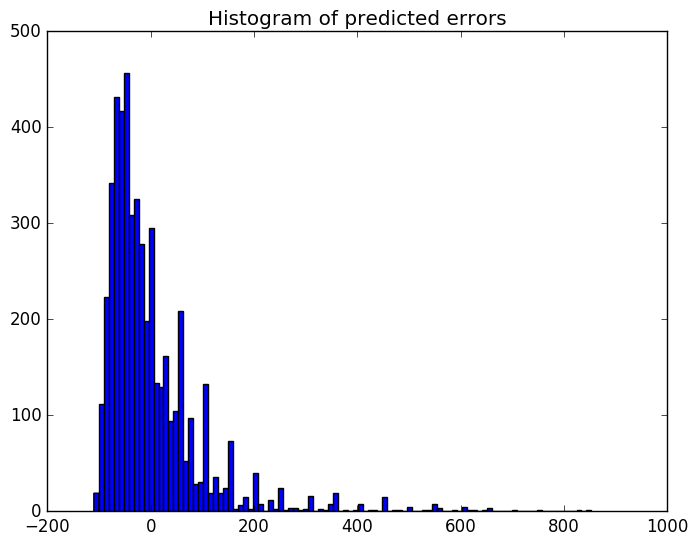

PyObject <matplotlib.text.Text object at 0x0000000032AECC88>

In [182]:
plt[:hist](matrix,bins=100)
title("Histogram of predicted errors")

In [7]:
ybar1=[]
k_range=range(1,size(X_train,1))
i_range=range(1,size(y_train,1))
w=importance
ybar1=[]
for k in k_range
    
    distance=[]
    for i in i_range
        diff=X_train[k,:]-X_base[i,:]
        diff_square=[x*x for x in diff]
        weighted_distance=(w'*diff_square)[1]
        push!(distance,weighted_distance)
        
    end   
    hcat(distance,1:length(distance))  
    sorted=sortrows(hcat(distance, 1:length(distance)), by = x -> x[1])
    wdis_10=sorted[1:10,2]
    sum_dis=0
    sum_price_dis=0
    for j in wdis_10
        weighted_distance=distance[j]
        exp_w_dis=exp(-weighted_distance)
        sum_dis=sum_dis+exp_w_dis
        sum_price_dis=sum_price_dis+y_base[j]*exp_w_dis
        
    end
    y_predict=sum_price_dis/sum_dis
    push!(ybar1,y_predict)
end
    
x=y_train[1:6552]-ybar1

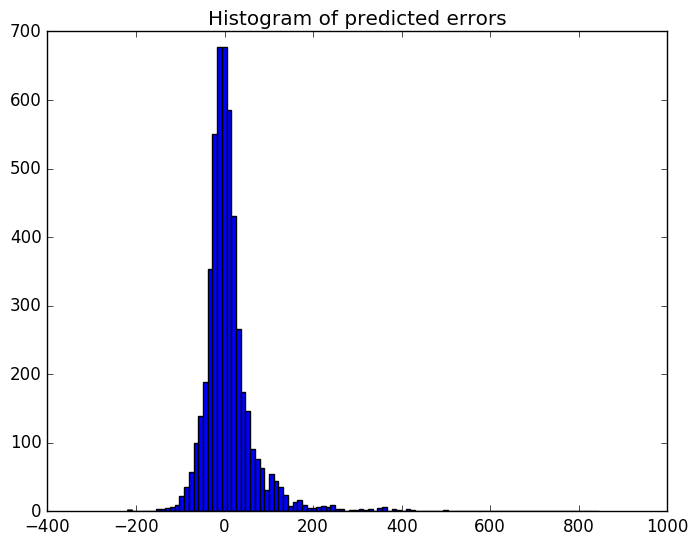

PyObject <matplotlib.text.Text object at 0x0000000032B24898>

In [184]:
plt[:hist](x,bins=100)
title("Histogram of predicted errors")

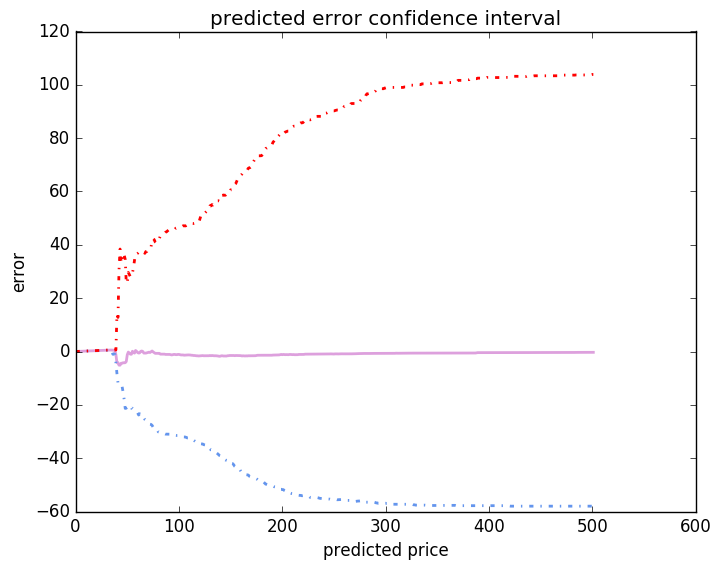

PyObject <matplotlib.text.Text object at 0x0000000028804F28>

In [60]:
h_ci = zeros(501)
l_ci = zeros(501)
m_ci = zeros(501)
axis = zeros(501)
for i in range(1,501)
    if sum((ybar1 - i).<1)>0
        axis[i] = i
        l_ci[i] = quantile(x[(ybar1 - i).<1],0.05)
        m_ci[i] = quantile(x[(ybar1 - i).<1],0.5)
        h_ci[i] = quantile(x[(ybar1 - i).<1],0.95)
    end
end

plot(axis, m_ci,color = "plum", linewidth = 2)

# plot error lines showing +/- std. errors of the scores

plot(axis, l_ci, color = "cornflowerblue", linestyle = "-.",linewidth = 2)
plot(axis, h_ci, color = "red", linestyle = "-.",linewidth = 2)
title("predicted error confidence interval")
xlabel("predicted price")
ylabel("error")
# alpha=0.2 controls the translucency of the fill color

#plot.ylabel('CV score +/- std error')
#plot.xlabel('alpha')